In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Initnial EDA

### Read the data

In [2]:
df = pd.read_csv('data.csv', usecols=[*range(0,12)], names=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,39,A0,77516,B0,13,C0,D0,E0,2174,0,40,0
1,50,A1,83311,B0,13,C1,D0,E0,0,0,13,0
2,38,A2,215646,B1,9,C2,D0,E0,0,0,40,0
3,53,A2,234721,B2,7,C2,D1,E0,0,0,40,0
4,28,A2,338409,B0,13,C3,D1,E1,0,0,40,0


In [4]:
df.shape

(10000, 12)

**The data does not seems to have a header/column row, it is reread with an added column name**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10000 non-null  int64 
 1   1       10000 non-null  object
 2   2       10000 non-null  int64 
 3   3       10000 non-null  object
 4   4       10000 non-null  int64 
 5   5       10000 non-null  object
 6   6       10000 non-null  object
 7   7       10000 non-null  object
 8   8       10000 non-null  int64 
 9   9       10000 non-null  int64 
 10  10      10000 non-null  int64 
 11  11      10000 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 937.6+ KB


**There are no null value**

In [6]:
df.describe()

,0,2,4,8,9,10,11
count,10000.000000,1.000000e+04,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.338300,1.906607e+05,10.12510,1077.261800,89.555300,41.067400,0.246100
std,13.086099,1.053789e+05,2.54411,7344.244588,403.778098,11.935112,0.430759
min,17.000000,1.930200e+04,1.00000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.185045e+05,9.00000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.794230e+05,10.00000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.395390e+05,13.00000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.226583e+06,16.00000,99999.000000,3004.000000,99.000000,1.000000


#### Check unique values in each column
##### All cols

In [7]:
columns = [*range(0,12)]
categorical_columns = [1, 3, 5, 6, 7]
for index, i in enumerate(columns):
    if index in categorical_columns: 
        data_type = 'categorical'
    else : 
        data_type = 'numeric'
    print('column %i \t has %i unique values, %s'%(i,len(df[i].unique()), data_type))

column 0 	 has 71 unique values, numeric
column 1 	 has 7 unique values, categorical
column 2 	 has 8457 unique values, numeric
column 3 	 has 16 unique values, categorical
column 4 	 has 16 unique values, numeric
column 5 	 has 14 unique values, categorical
column 6 	 has 5 unique values, categorical
column 7 	 has 2 unique values, categorical
column 8 	 has 97 unique values, numeric
column 9 	 has 72 unique values, numeric
column 10 	 has 85 unique values, numeric
column 11 	 has 2 unique values, numeric


##### numeric only

In [8]:
for index, i in enumerate(columns):
    data_type = 'numeric'
    if index not in categorical_columns: 
        print('column %i \t has %i unique values, %s'%(i,len(df[i].unique()), data_type))

column 0 	 has 71 unique values, numeric
column 2 	 has 8457 unique values, numeric
column 4 	 has 16 unique values, numeric
column 8 	 has 97 unique values, numeric
column 9 	 has 72 unique values, numeric
column 10 	 has 85 unique values, numeric
column 11 	 has 2 unique values, numeric


##### categorical

In [9]:
col_to_add = 0
for index, i in enumerate(columns):
    data_type = 'categorical'
    if index in categorical_columns: 
        print('column %i \t has %i unique values, %s'%(i,len(df[i].unique()), data_type))
        col_to_add+=len(df[i].unique())
print('col to be added with dummbies', col_to_add)

column 1 	 has 7 unique values, categorical
column 3 	 has 16 unique values, categorical
column 5 	 has 14 unique values, categorical
column 6 	 has 5 unique values, categorical
column 7 	 has 2 unique values, categorical
col to be added with dummbies 44


#### col 11 unique values

In [10]:
df[11].unique()

array([0, 1])

#### Graphs

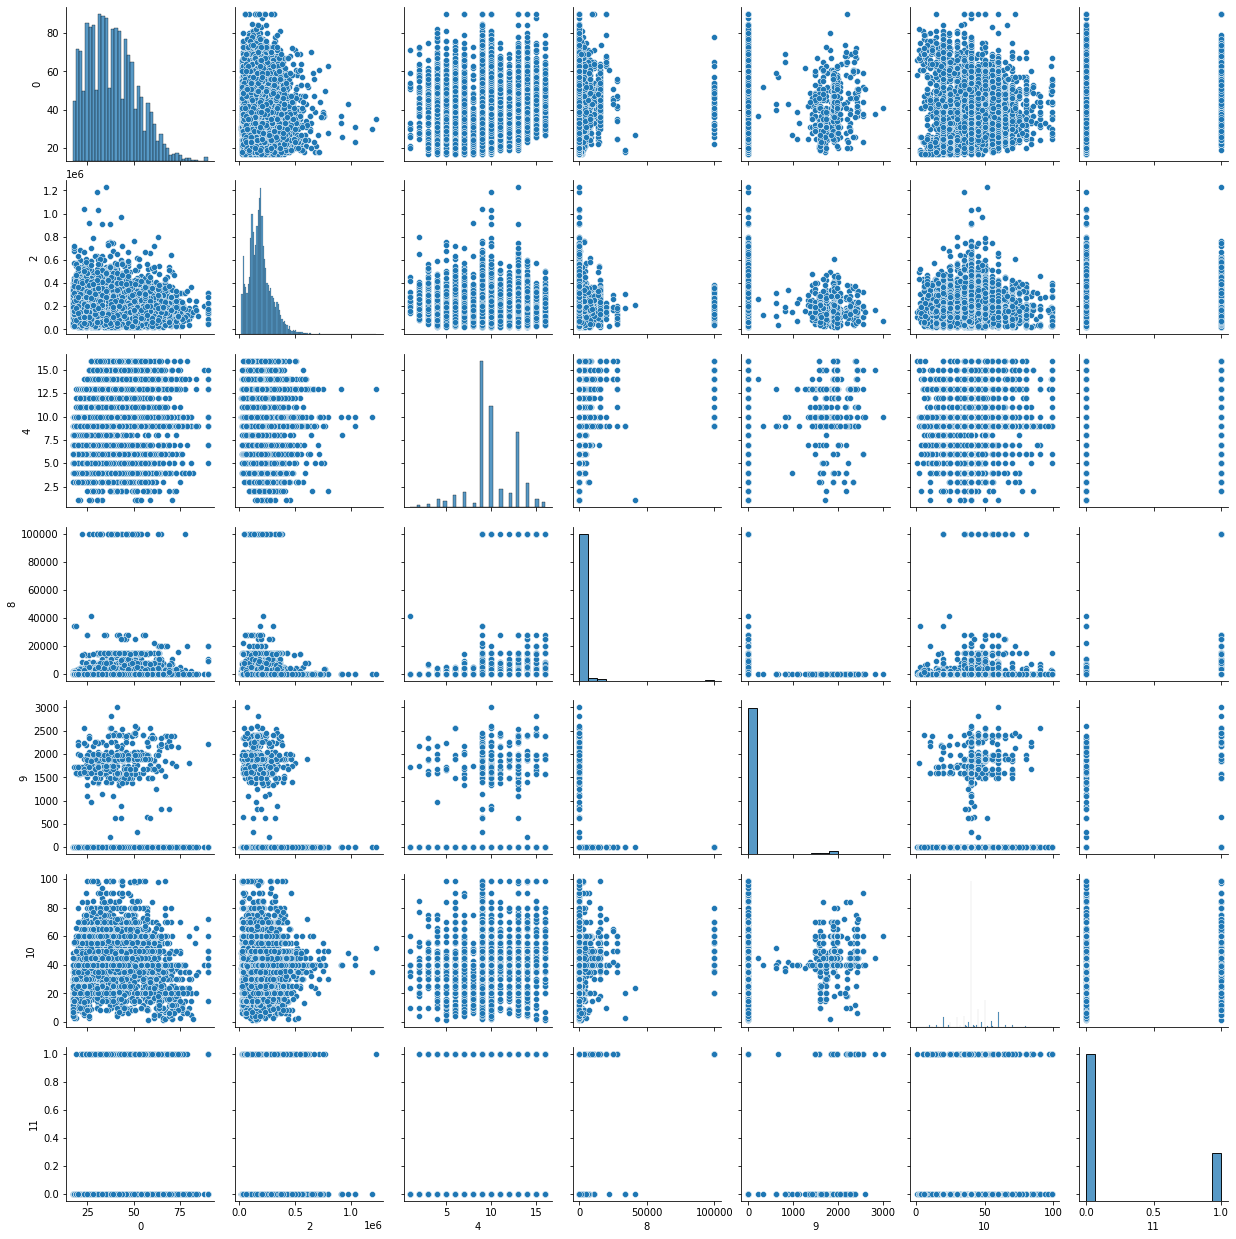

In [11]:
sns.pairplot(df)

<AxesSubplot:>

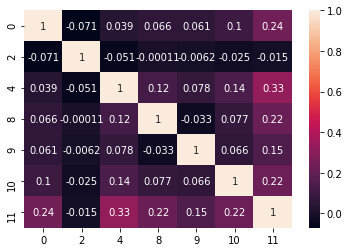

In [13]:
sns.heatmap(df[[0, 2, 4, 8, 9, 10, 11]].corr(), annot = True)

**There are very little correlation between the numeric data and the target column**

### Feature Engineering on the categorical columns
#### Each Unique values get a col

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
ohe = OneHotEncoder()
feature_arr = ohe.fit_transform(df[[1]]).toarray()
feature_label = [str(1) + "_" + str(i) for i in range(feature_arr.shape[1])]
feature = pd.DataFrame(feature_arr, columns=feature_label)

In [76]:
# if data is categorical, transform them
df_ohe = df.copy()
for index, i in enumerate(columns):
    if index in categorical_columns: 
        ohe = OneHotEncoder()
        feature_arr = ohe.fit_transform(df[[index]]).toarray()
        feature_label = [str(index) + "_" + str(k) for k in range(feature_arr.shape[1])]
        feature = pd.DataFrame(feature_arr, columns=feature_label)
        # drop the last col
        feature = feature.iloc[:, :-1]
        df_ohe = pd.concat([df_ohe, feature], axis=1)
        df_ohe.drop(index, axis=1, inplace=True)

In [77]:
df_ohe.head()

,0,2,4,8,9,10,11,1_0,1_1,1_2,...,5_8,5_9,5_10,5_11,5_12,6_0,6_1,6_2,6_3,7_0
0,39,77516,13,2174,0,40,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,50,83311,13,0,0,13,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,38,215646,9,0,0,40,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,53,234721,7,0,0,40,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,28,338409,13,0,0,40,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [78]:
df_ohe.columns

Index([     0,      2,      4,      8,      9,     10,     11,  '1_0',  '1_1',
        '1_2',  '1_3',  '1_4',  '1_5',  '3_0',  '3_1',  '3_2',  '3_3',  '3_4',
        '3_5',  '3_6',  '3_7',  '3_8',  '3_9', '3_10', '3_11', '3_12', '3_13',
       '3_14',  '5_0',  '5_1',  '5_2',  '5_3',  '5_4',  '5_5',  '5_6',  '5_7',
        '5_8',  '5_9', '5_10', '5_11', '5_12',  '6_0',  '6_1',  '6_2',  '6_3',
        '7_0'],
      dtype='object')

## Train

### Split the data

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X = df_ohe.drop(11, axis=1).values
y = df_ohe[11].values

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [128]:
scaler = MinMaxScaler()

In [129]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
# model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [119]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=150, verbose=1)

In [144]:
model = Sequential()
model.add(Dense(units=45, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=90, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=11, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))
# loss for binary
model.compile(loss='binary_crossentropy', optimizer='SGD')

In [146]:
model.fit(x=X_train, y=y_train, epochs=2000, validation_data=(X_test, y_test), verbose=1,callbacks=early_stop)

Epoch 1/2000
219/219 [==============================] - 0s 981us/step - loss: 0.4092 - val_loss: 0.3874
Epoch 2/2000
219/219 [==============================] - 0s 985us/step - loss: 0.4070 - val_loss: 0.3898
Epoch 3/2000
219/219 [==============================] - 0s 960us/step - loss: 0.4131 - val_loss: 0.3895
Epoch 4/2000
219/219 [==============================] - 0s 971us/step - loss: 0.4095 - val_loss: 0.3907
Epoch 5/2000
219/219 [==============================] - 0s 977us/step - loss: 0.4046 - val_loss: 0.3873
Epoch 6/2000
219/219 [==============================] - 0s 984us/step - loss: 0.4090 - val_loss: 0.3899
Epoch 7/2000
219/219 [==============================] - 0s 965us/step - loss: 0.4125 - val_loss: 0.3935
Epoch 8/2000
219/219 [==============================] - 0s 979us/step - loss: 0.4038 - val_loss: 0.3872
Epoch 9/2000
219/219 [==============================] - 0s 970us/step - loss: 0.4086 - val_loss: 0.3890
Epoch 10/2000
219/219 [==============================] - 0s 977u

<AxesSubplot:>

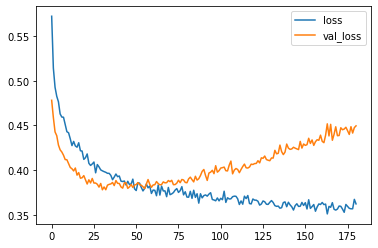

In [142]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### Predictions

In [125]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [147]:
predictions = model.predict_classes(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("accuracy_score", accuracy_score(y_test, predictions))

[[2189   79]
 [ 456  276]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2268
           1       0.78      0.38      0.51       732

    accuracy                           0.82      3000
   macro avg       0.80      0.67      0.70      3000
weighted avg       0.82      0.82      0.80      3000

accuracy_score 0.8216666666666667
